In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\hOLS_INDIA.CSV',header=None,names=["created_at","text","screen_name","location"])
#np.random.seed(0)

In [3]:
df.head(20)

,created_at,text,screen_name,location
0,29-01-2022 12:59,b'Register for Demo on #DELLBOOMI: https://t.c...,b'AstsTraining',"b'Hyderabad, India'"
1,29-01-2022 12:10,b'Old man.Oil pastel on paper.\n#abhibiswas34 ...,b'artist__abhi',"b'Jaipur, India'"
2,29-01-2022 12:05,b'Top 5 UX/UI Design Courses in Mumbai\nhttps:...,b'tweetvaibhav',b'New Delhi India'
3,29-01-2022 11:30,b'Chennai admin. requested the #MadrasHighCour...,b'xpresstn',"b'Chennai, India'"
4,29-01-2022 09:37,b'Admission Open\nFree Admission for Girls\n\n...,b'SanskarPublic',"b'Pandeypur, Mirzapur, India'"
5,29-01-2022 09:00,b'Top 5 Web Designing Courses in Bangalore\nht...,b'tweetvaibhav',b'New Delhi India'
6,29-01-2022 08:06,b'#SharekhanClassroom | Trying to learn the sk...,b'Sharekhan',b'India'
7,29-01-2022 07:30,b'The BBA course enables an individual to mana...,b'NoidaNims',"b'Noida, India'"
8,29-01-2022 07:29,b'#Onlineclasses #Guitarist #musica #learning ...,b'Dharmesh2201',"b'Ahmadabad City, India'"
9,29-01-2022 07:22,b'#ticse.org/studyabroad/study-in-nurses\n#oet...,b'theimmaculate3',b'Chennai India'


In [4]:
df.shape

(387, 4)

In [5]:

    df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
df ['text']= df['text'].str.replace('RT ', '', case=False)  # Removing the phrase 'RT" from all strings
df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
#df['text'] = df['text'].str.replace('[' 'b]','')
#df['text'] = df['text'].str.replace('[x[a-z]]','')
df ['text']= df['text'].str.replace('\r\n', ' ')  # Removing '\r\n' which is present in some strings
df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


C:\Users\DELL\AppData\Local\Temp/ipykernel_12808/1243268230.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].astype(str).str.replace('http\S+|www.\S+', '', case=False)  # Removing URL's from data set
C:\Users\DELL\AppData\Local\Temp/ipykernel_12808/1243268230.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]', ' ')  # Removing any punctuation
C:\Users\DELL\AppData\Local\Temp/ipykernel_12808/1243268230.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+', '').str.lower().str.strip()  # Removing numbers, capitalisation and white space


In [6]:
df.head(10)

,created_at,text,screen_name,location
0,29-01-2022 12:59,b register for demo on dellboomi more,b'AstsTraining',"b'Hyderabad, India'"
1,29-01-2022 12:10,b old man oil pastel on paper n abhibiswas a...,b'artist__abhi',"b'Jaipur, India'"
2,29-01-2022 12:05,b top ux ui design courses in mumbai n mumba...,b'tweetvaibhav',b'New Delhi India'
3,29-01-2022 11:30,b chennai admin requested the madrashighcout...,b'xpresstn',"b'Chennai, India'"
4,29-01-2022 09:37,b admission open nfree admission for girls n n...,b'SanskarPublic',"b'Pandeypur, Mirzapur, India'"
5,29-01-2022 09:00,b top web designing courses in bangalore n o...,b'tweetvaibhav',b'New Delhi India'
6,29-01-2022 08:06,b sharekhanclassroom trying to learn the sk...,b'Sharekhan',b'India'
7,29-01-2022 07:30,b the bba course enables an individual to mana...,b'NoidaNims',"b'Noida, India'"
8,29-01-2022 07:29,b onlineclasses guitarist musica learning ...,b'Dharmesh2201',"b'Ahmadabad City, India'"
9,29-01-2022 07:22,b ticse org studyabroad study in nurses n oet...,b'theimmaculate3',b'Chennai India'


In [7]:
 nltk.download('stopwords')  # Downloading stop words
#stop = set(stopwords.words('english'))  # Selecting English stop words
#df['text'] = df['text'] .apply(lambda x: [item for item in x if item not in stop])  # Removing stop words from each string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
df.shape[0]

387

In [9]:
lemmatizer = WordNetLemmatizer()
for i in range(df.shape[0]):
    words=nltk.word_tokenize(df['text'][i])
    words = [lemmatizer.lemmatize(w, pos='a') for w in words if w not in set(stopwords.words("english")) ]
    df['text'][i]=' '.join(words)

In [10]:
df['text'][10]

'b smitaprakash onlineclasses diluted form educating inculcate discipline uniformity xe x xa'

In [11]:
df.head(10)

,created_at,text,screen_name,location
0,29-01-2022 12:59,b register demo dellboomi,b'AstsTraining',"b'Hyderabad, India'"
1,29-01-2022 12:10,b old man oil pastel paper n abhibiswas avijit...,b'artist__abhi',"b'Jaipur, India'"
2,29-01-2022 12:05,b top ux ui design courses mumbai n mumbai onl...,b'tweetvaibhav',b'New Delhi India'
3,29-01-2022 11:30,b chennai admin requested madrashighcoutime ti...,b'xpresstn',"b'Chennai, India'"
4,29-01-2022 09:37,b admission open nfree admission girls n nhurr...,b'SanskarPublic',"b'Pandeypur, Mirzapur, India'"
5,29-01-2022 09:00,b top web designing courses bangalore n online...,b'tweetvaibhav',b'New Delhi India'
6,29-01-2022 08:06,b sharekhanclassroom trying learn skills shote...,b'Sharekhan',b'India'
7,29-01-2022 07:30,b bba course enables individual manage large c...,b'NoidaNims',"b'Noida, India'"
8,29-01-2022 07:29,b onlineclasses guitarist musica learning pian...,b'Dharmesh2201',"b'Ahmadabad City, India'"
9,29-01-2022 07:22,b ticse org studyabroad study nurses n oetprep...,b'theimmaculate3',b'Chennai India'


In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

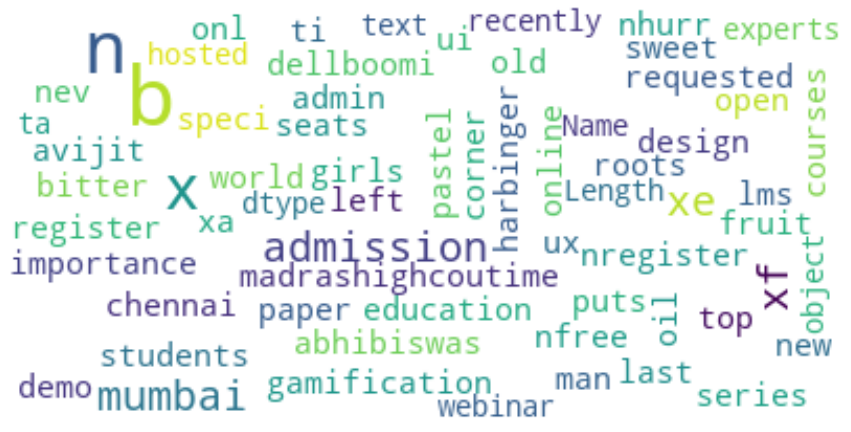

In [13]:
#wordcloud after preprocessing and removing stopwords
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['text'])

In [14]:
df.shape

(387, 4)

In [15]:
df.isna().sum
tweet=df.copy()

In [16]:
tweet.head()

,created_at,text,screen_name,location
0,29-01-2022 12:59,b register demo dellboomi,b'AstsTraining',"b'Hyderabad, India'"
1,29-01-2022 12:10,b old man oil pastel paper n abhibiswas avijit...,b'artist__abhi',"b'Jaipur, India'"
2,29-01-2022 12:05,b top ux ui design courses mumbai n mumbai onl...,b'tweetvaibhav',b'New Delhi India'
3,29-01-2022 11:30,b chennai admin requested madrashighcoutime ti...,b'xpresstn',"b'Chennai, India'"
4,29-01-2022 09:37,b admission open nfree admission girls n nhurr...,b'SanskarPublic',"b'Pandeypur, Mirzapur, India'"


In [17]:
tweet['sentiment'] = ' '
tweet['polarity'] = None
for i,tweets in enumerate(tweet.text) :
    blob = TextBlob(tweets)
    tweet['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet['sentiment'][i] = 'negative'
    else :
        tweet['sentiment'][i] = 'neutral'
tweet.head()

,created_at,text,screen_name,location,sentiment,polarity
0,29-01-2022 12:59,b register demo dellboomi,b'AstsTraining',"b'Hyderabad, India'",neutral,0.0
1,29-01-2022 12:10,b old man oil pastel paper n abhibiswas avijit...,b'artist__abhi',"b'Jaipur, India'",positive,0.1
2,29-01-2022 12:05,b top ux ui design courses mumbai n mumbai onl...,b'tweetvaibhav',b'New Delhi India',positive,0.5
3,29-01-2022 11:30,b chennai admin requested madrashighcoutime ti...,b'xpresstn',"b'Chennai, India'",positive,0.05
4,29-01-2022 09:37,b admission open nfree admission girls n nhurr...,b'SanskarPublic',"b'Pandeypur, Mirzapur, India'",neutral,0.0


In [18]:
tweet['sentiment'].value_counts()

neutral     172
positive    172
negative     43
Name: sentiment, dtype: int64

In [19]:
sentiment_df = pd.DataFrame(tweet, columns=[ "text","polarity","sentiment"])

sentiment_df.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA pol sent.csv")


sentiment_df.head(10)

,text,polarity,sentiment
0,b register demo dellboomi,0.0,neutral
1,b old man oil pastel paper n abhibiswas avijit...,0.1,positive
2,b top ux ui design courses mumbai n mumbai onl...,0.5,positive
3,b chennai admin requested madrashighcoutime ti...,0.05,positive
4,b admission open nfree admission girls n nhurr...,0.0,neutral
5,b top web designing courses bangalore n online...,0.5,positive
6,b sharekhanclassroom trying learn skills shote...,0.0,neutral
7,b bba course enables individual manage large c...,0.107143,positive
8,b onlineclasses guitarist musica learning pian...,0.0,neutral
9,b ticse org studyabroad study nurses n oetprep...,0.0,neutral


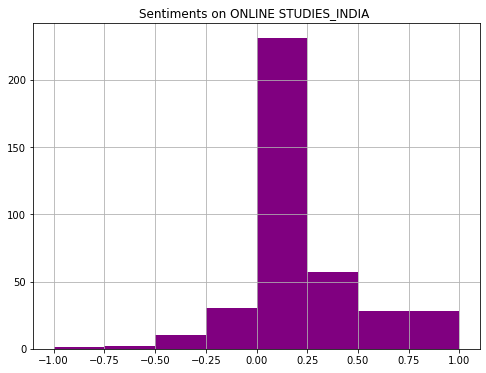

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
tweet['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments on ONLINE STUDIES_INDIA ")
plt.show()

In [21]:
#feature extraction(only feature)
y=tweet['sentiment'].values
y.shape

(387,)

In [22]:
x=tweet['text'].values
x.shape

(387,)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(309,)
(309,)
(78,)


(78,)

neutral     172
positive    172
negative     43
Name: sentiment, dtype: int64


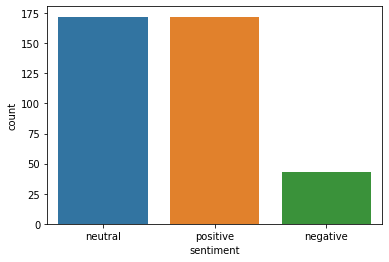

In [25]:
print(tweet.sentiment.value_counts())
sns.countplot(x='sentiment', data = tweet);

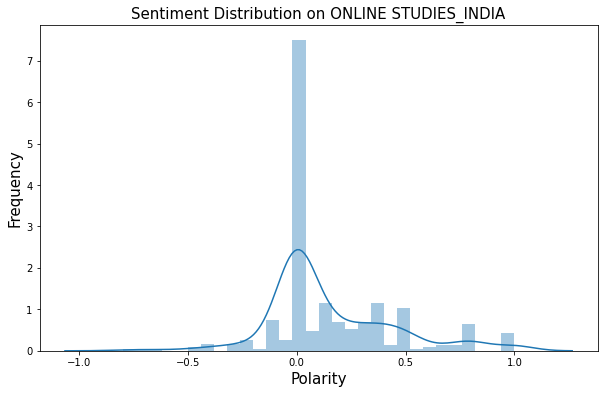

In [26]:
plt.figure(figsize=(10,6))
sns.distplot(tweet['polarity'], bins=30)
plt.title('Sentiment Distribution on ONLINE STUDIES_INDIA',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

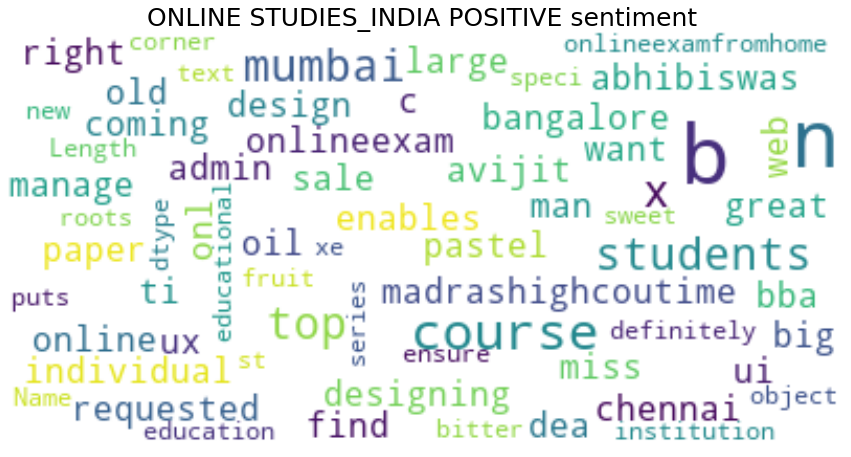

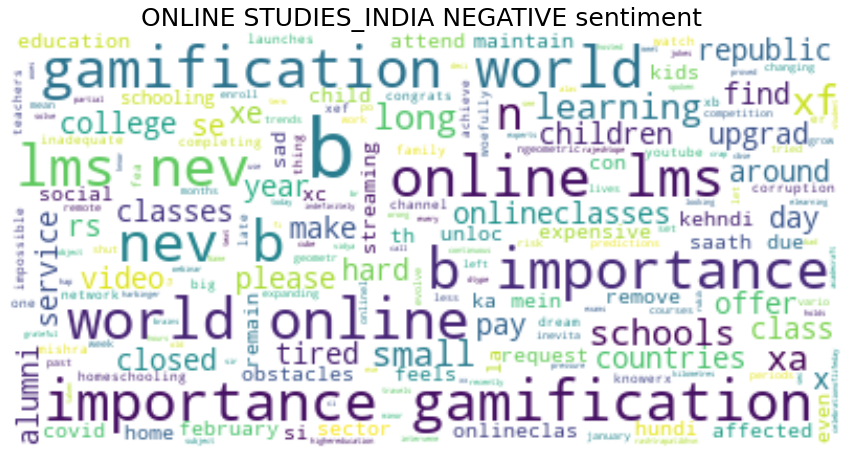

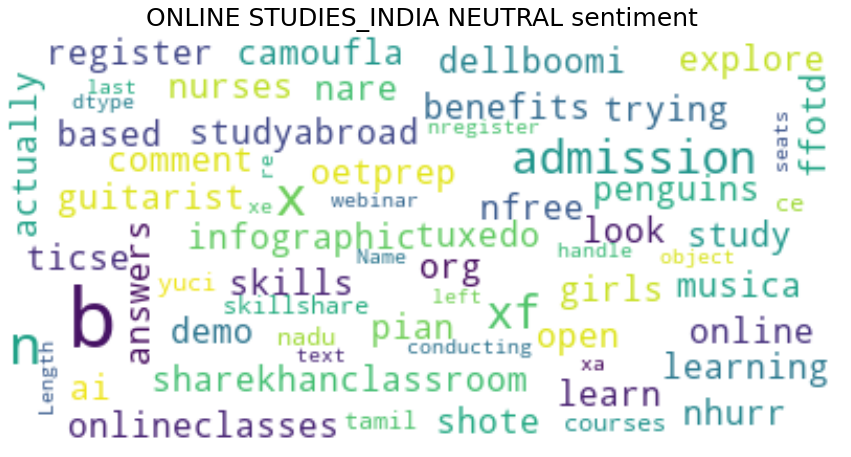

In [27]:
#wordcount with sentiment
pos = tweet['text'][tweet['sentiment'] == 'positive']
show_wordcloud(pos , 'ONLINE STUDIES_INDIA POSITIVE sentiment ')

neg = tweet['text'][tweet['sentiment'] == 'negative']
show_wordcloud(neg , 'ONLINE STUDIES_INDIA NEGATIVE sentiment ')

neutral = tweet['text'][tweet['sentiment'] == 'neutral']
show_wordcloud(neutral , 'ONLINE STUDIES_INDIA NEUTRAL sentiment ')

In [28]:
count = pd.DataFrame(tweet.groupby('sentiment').sum())
count

,created_at,text,screen_name,location,polarity
sentiment,,,,,
negative,29-01-2022 05:4528-01-2022 18:2528-01-2022 02:...,b college expensive video streaming service la...,b'priteshh25'b'RibabulA'b'Jagranjosh'b'sweedu_...,"b'Nashik, India'b'Guwahati, India'b'India'b'Gu...",-9.583333
neutral,29-01-2022 12:5929-01-2022 09:3729-01-2022 08:...,b register demo dellboomib admission open nfre...,b'AstsTraining'b'SanskarPublic'b'Sharekhan'b'D...,"b'Hyderabad, India'b'Pandeypur, Mirzapur, Indi...",0.000000
positive,29-01-2022 12:1029-01-2022 12:0529-01-2022 11:...,b old man oil pastel paper n abhibiswas avijit...,b'artist__abhi'b'tweetvaibhav'b'xpresstn'b'twe...,"b'Jaipur, India'b'New Delhi India'b'Chennai, I...",66.812830


In [29]:
words = []
words = [word for i in tweet.text for word in i.split()]

In [30]:
words

['b',
 'register',
 'demo',
 'dellboomi',
 'b',
 'old',
 'man',
 'oil',
 'pastel',
 'paper',
 'n',
 'abhibiswas',
 'avijit',
 'artistontwitter',
 'artist',
 'artsofashes',
 'artoflegends',
 'artph',
 'xe',
 'x',
 'xa',
 'b',
 'top',
 'ux',
 'ui',
 'design',
 'courses',
 'mumbai',
 'n',
 'mumbai',
 'onlineclasses',
 'b',
 'chennai',
 'admin',
 'requested',
 'madrashighcoutime',
 'till',
 'end',
 'academic',
 'year',
 'complete',
 'eviction',
 'xe',
 'x',
 'xa',
 'b',
 'admission',
 'open',
 'nfree',
 'admission',
 'girls',
 'n',
 'nhurry',
 'admission',
 'open',
 'xe',
 'x',
 'xa',
 'b',
 'top',
 'web',
 'designing',
 'courses',
 'bangalore',
 'n',
 'onlinecourses',
 'onlineclasses',
 'xe',
 'x',
 'xa',
 'b',
 'sharekhanclassroom',
 'trying',
 'learn',
 'skills',
 'shoterm',
 'trading',
 'getting',
 'stuck',
 'case',
 'check',
 'xe',
 'x',
 'xa',
 'b',
 'bba',
 'course',
 'enables',
 'individual',
 'manage',
 'large',
 'corporations',
 'qualifies',
 'multidisciplinary',
 'management',
 

In [31]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head(20)

,word,frequency
0,x,552
1,xe,433
2,xa,401
3,b,387
4,n,361
5,xf,238
6,xd,75
7,th,62
8,online,60
9,xb,49


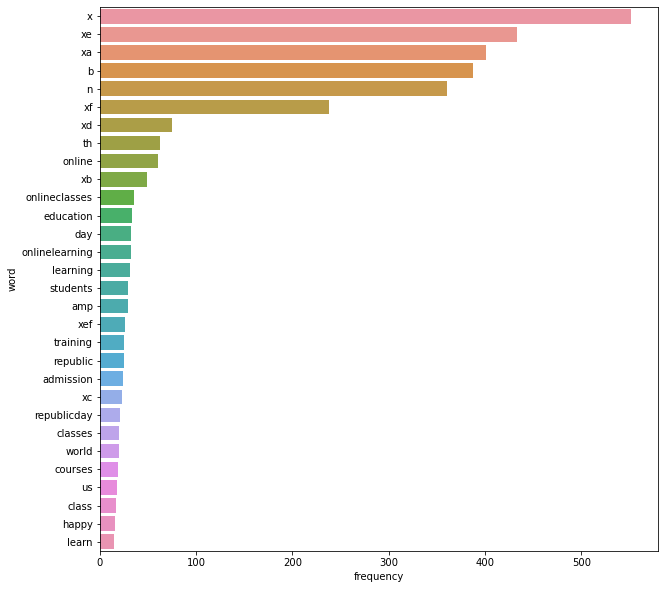

In [32]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq);

In [33]:
tweet.to_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_Final_sent_analysis.csv',index=False)

In [34]:
sentiment_df.head()

,text,polarity,sentiment
0,b register demo dellboomi,0.0,neutral
1,b old man oil pastel paper n abhibiswas avijit...,0.1,positive
2,b top ux ui design courses mumbai n mumbai onl...,0.5,positive
3,b chennai admin requested madrashighcoutime ti...,0.05,positive
4,b admission open nfree admission girls n nhurr...,0.0,neutral


In [35]:
sentiment_df.describe()

,text,polarity,sentiment
count,387,387.0,387
unique,358,90.0,3
top,b importance gamification world online lms nev...,0.0,neutral
freq,9,172.0,172


In [36]:
sentiment_df.groupby('sentiment').size()

sentiment
negative     43
neutral     172
positive    172
dtype: int64

In [37]:
print(sentiment_df.groupby('polarity').size())

polarity
-0.800000     1
-0.700000     1
-0.650000     1
-0.500000     1
-0.491667     1
             ..
 0.650000     1
 0.700000     2
 0.750000     3
 0.800000    15
 1.000000    10
Length: 90, dtype: int64


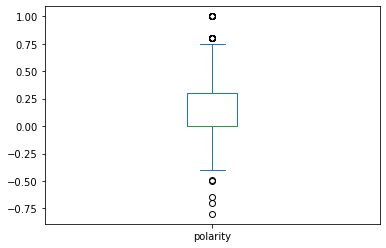

In [38]:
import matplotlib.pyplot as plt
sentiment_df.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

In [39]:
clo=['sentiment','polarity','text']
dataset2=sentiment_df.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

,sentiment,polarity,text
0,neutral,0.0,b register demo dellboomi
1,positive,0.1,b old man oil pastel paper n abhibiswas avijit...
2,positive,0.5,b top ux ui design courses mumbai n mumbai onl...
3,positive,0.05,b chennai admin requested madrashighcoutime ti...
4,neutral,0.0,b admission open nfree admission girls n nhurr...
5,positive,0.5,b top web designing courses bangalore n online...
6,neutral,0.0,b sharekhanclassroom trying learn skills shote...
7,positive,0.107143,b bba course enables individual manage large c...
8,neutral,0.0,b onlineclasses guitarist musica learning pian...
9,neutral,0.0,b ticse org studyabroad study nurses n oetprep...


In [40]:
dataset2.describe()#dataset2.hist()
#plt.show()

,sentiment,polarity,text
count,387,387.0,387
unique,3,90.0,358
top,neutral,0.0,b importance gamification world online lms nev...
freq,172,172.0,9


In [41]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'text'})

In [42]:
df1.head()

,text
0,b keep learning going innovative messaging gup...
1,b best vfx courses mumbai placement assistance...
2,b gain knowledge practice smartly tutoroot exp...
3,b weight loss yoga classes practice warrior yo...
4,b gujarat university allows post graduate stud...


In [43]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [44]:
df_train.head()

,text,sentiment
0,b keep learning going innovative messaging gup...,positive
1,b best vfx courses mumbai placement assistance...,positive
2,b gain knowledge practice smartly tutoroot exp...,positive
3,b weight loss yoga classes practice warrior yo...,neutral
4,b gujarat university allows post graduate stud...,neutral


In [45]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'text'})

In [46]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [47]:
df_test.head()

,text,sentiment
0,b xe x xm offline nam worried daily needs food...,positive
1,b yoga journey self self self nif planning sta...,positive
2,b one could always wait last day nenroll impro...,positive
3,b big sale coming want miss n n find great dea...,neutral
4,b elearning pitfalls avoid n education trainin...,neutral


In [48]:
import string
string.punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [49]:
#storing the puntuation free text in a new column called clean_msg
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [50]:
df_train.head()
#punctuations are removed from news column in train dataset

,text,sentiment
0,b keep learning going innovative messaging gup...,positive
1,b best vfx courses mumbai placement assistance...,positive
2,b gain knowledge practice smartly tutoroot exp...,positive
3,b weight loss yoga classes practice warrior yo...,neutral
4,b gujarat university allows post graduate stud...,neutral


In [51]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [53]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [54]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['b', 'keep', 'learning', 'going', 'innovative', 'messaging', 'gupshup', 'smachatbot', 'assistance', 'international', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'best', 'vfx', 'courses', 'mumbai', 'placement', 'assistance', 'n', 'mumbai', 'placement', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gain', 'knowledge', 'practice', 'smartly', 'tutoroot', 'explore', 'program', 'sign', 'today', 'n', 'nlog', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'discover', 'benefits', 'earning', 'online', 'degree', 'find', 'compare', 'top', 'universities', 'subjec', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'punjab', 'govt', 'ties', 'khan', 'academy', 'generate', 'educational', 'content', 'punjabi', 'school', 'students', 'n', 'n', 'khanacademy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'find', 'key', 'success', 'alarm', 'clock', 'benjamin', 'franklin', 'n', 'n']
Sentence after removing stopword

Sentence after removing stopwords: ['b', 'economic', 'office', 'wfh', 'pc', 'nperfect', 'pc', 'basic', 'needs', 'n', 'budgetpc', 'gamingpc', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'helpful', 'consultants', 'help', 'make', 'procedure', 'admission', 'goes', 'smoothly', 'n', 'n', 'n', 'n', 'n', 'mca', 'degree', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'fittrwithsquats', 'announced', 'collaboration', 'vedantulearn', 'promote', 'healthy', 'active', 'living', 'children', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'avail', 'bsnl', 'special', 'offers', 'n', 'days', 'extra', 'validity', 'bsnlpv', 'ngb', 'day', 'data', 'u', 'l', 'local', 'std', 'calls', 'days', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'top', 'financial', 'modeling', 'courses', 'pune', 'placements', 'n', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'good', 'times', 'crazy', 'friends', 'great', 'memories', 'nand', 'year', 'experienced

Sentence after removing stopwords: ['b', 'new', 'card', 'nplace', 'order', 'stationery', 'homework', 'classof', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'old', 'man', 'oil', 'pastel', 'paper', 'n', 'abhibiswas', 'avijit', 'artistontwitter', 'artist', 'artsofashes', 'artoflegends', 'artph', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'warli', 'one', 'old', 'forms', 'indian', 'folk', 'art', 'members', 'enjoyed', 'also', 'aced', 'warl', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'student', 'work', 'done', 'year', 'old', 'sarayu', 'level', 'online', 'practice', 'sessions', 'n', 'n', 'artwork', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'improve', 'english', 'speaking', 'skills', 'online', 'classes', 'pearson', 'mepro', 'offers', 'periodic', 'assessments', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xe', 'x', 'xre', 'looking', 'new', 'exciting', 'books', 'add', 'reading', 'list', 'send', 'u

In [55]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['b', 'past', 'months', 'children', 'tried', 'work', 'around', 'various', 'ways', 'build', 'investment', 'towards', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'importance', 'gamification', 'world', 'online', 'lms', 'nevery', 'training', 'professional', 'encountered', 'common', 'problem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'importance', 'gamification', 'world', 'online', 'lms', 'nevery', 'training', 'professional', 'encountered', 'common', 'problem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'big', 'congrats', 'knowerx', 'family', 'completing', 'long', 'years', 'n', 'thanniversary', 'th', 'anniversary', 'celebration', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'republic', 'day', 'offer', 'pay', 'small', 'rs', 'n', 'find', 'unlock', 'mobile', 'xf', 'xf', 'xa', 'xd', 'contact', 'us', 'today', 'nvisit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'onlineclasses', 'woefully'

In [56]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['b', 'weight', 'loss', 'yoga', 'classes', 'practice', 'warrior', 'yoga', 'poses', 'develop', 'warrior', 'mindset', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gujarat', 'university', 'allows', 'post', 'graduate', 'students', 'freedom', 'appear', 'examination', 'time', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'internationalstudent', 'leeds', 'uk', 'sameepkulkarni', 'sameepkulkarnidisciple', 'music', 'sitar', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'students', 'presently', 'class', 'v', 'vi', 'vii', 'viii', 'ix', 'x', 'amp', 'xi', 'ntest', 'date', 'th', 'th', 'th', 'th', 'th', 'th', 'th', 'amp', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'student', 'works', 'works', 'done', 'students', 'level', 'basic', 'program', 'aging', 'years', 'n', 'n', 'art', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sunsetphotography', 'ncreator', 'thakurtms', 'nfollow', 'in

Sentence after removing stopwords: ['b', 'admission', 'open', 'nfrom', 'nursery', 'std', 'x', 'nfor', 'ay', 'n', 'n', 'universalschool', 'nanded', 'admissionopen', 'school', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'register', 'upcoming', 'fiitjee', 'admission', 'test', 'xe', 'x', 'xt', 'miss', 'n', 'xe', 'x', 'xaa', 'xef', 'xb', 'xfexam', 'date', 'th', 'amp', 'feb', 'n', 'xe', 'x', 'xaa', 'xef', 'xb', 'xffor', 'students', 'c', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'national', 'producer', 'number', 'assigns', 'nread', 'npn', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'teach', 'students', 'artteacher', 'n', 'hometution', 'education', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'xef', 'xb', 'xf', 'date', 'th', 'feb', 'n', 'n', 'xe', 'xf', 'xb', 'time', 'pm', 'ist', 'n', 'nplace', 'zoom', 'online', 'n', 'n', 'xf', 'xf', 'x', 'x', 'registration', 'link', 'xe', 'x', 'xa']
Sentence after removing stopword

Sentence after removing stopwords: ['b', 'register', 'demo', 'dellboomi']
Sentence after removing stopwords: ['b', 'ignou', 'admission', 'ignou', 'launches', 'pg', 'diploma', 'migration', 'diaspora', 'n', 'n', 'ignou', 'admissions', 'migration', 'diaspora', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'join', 'informative', 'workshop', 'tomorrow', 'njanuary', 'th', 'n']
Sentence after removing stopwords: ['b', 'ticse', 'org', 'studyabroad', 'study', 'nurses', 'n', 'oetpreparation', 'ieltspreparation', 'learn', 'studyabroad', 'onlineclasses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tie', 'kolkata', 'webinar', 'unravelling', 'metaverse', 'mr', 'nikhil', 'malhotra', 'cio', 'tech', 'mahindra', 'moderated', 'mr', 'abhis', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'telangana', 'school', 'education', 'department', 'instructed', 'officials', 'conduct', 'online', 'classes', 'classes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tips

In [57]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [58]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_unigrampositive.csv",mode='w',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_unigramnegative.csv",mode='w',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_unigramneutral.csv",mode='w',index=False,header=False)

In [59]:
df_positive.shape

(954, 2)

In [60]:
df_negative.shape

(251, 2)

In [61]:
df_neutral.shape

(756, 2)

In [62]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_unigram_combine.csv",mode='a',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_unigram_combine.csv",mode='a',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_unigram_combine.csv",mode='a',index=False,header=False)

In [63]:
df3=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_unigram_combine.csv",header=None,names=["unigram","repetation"])
#np.random.seed(0))
df3.head()

,unigram,repetation
0,unigram,repetation
1,x,210
2,xe,168
3,xa,158
4,b,139


In [64]:
df3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_unigram_combine.csv",index=False)

In [65]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [66]:
df3.shape

(3945, 2)

In [67]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [68]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

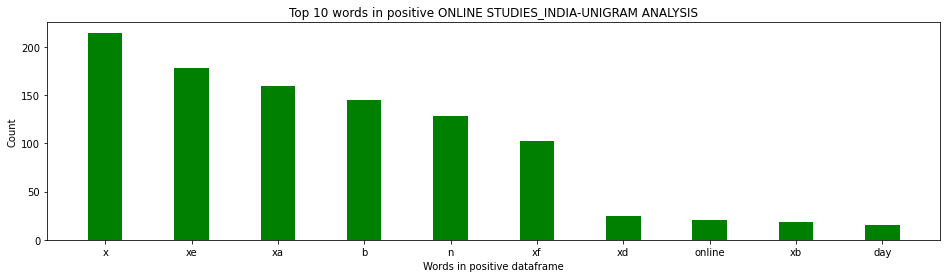

In [69]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive ONLINE STUDIES_INDIA-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

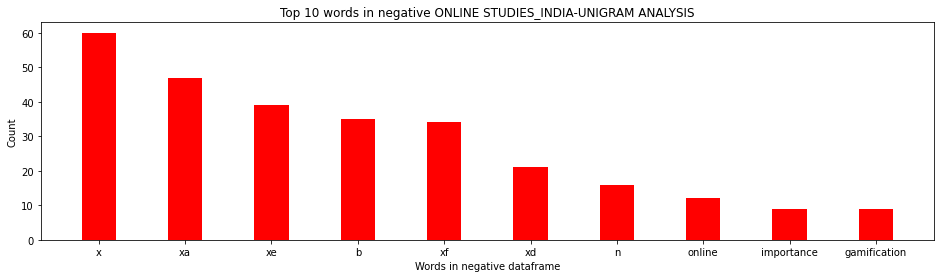

In [70]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative ONLINE STUDIES_INDIA-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

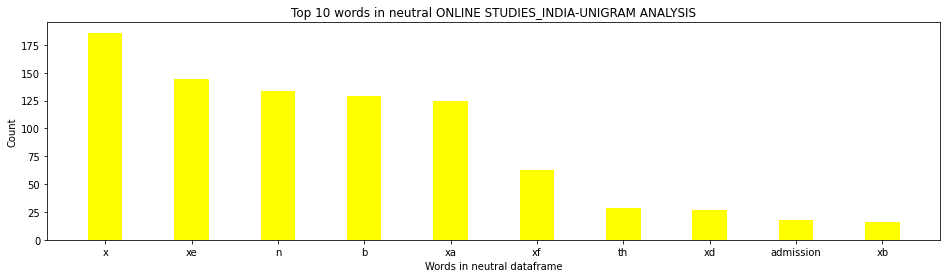

In [71]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral ONLINE STUDIES_INDIA-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [72]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [73]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['b', 'keep', 'learning', 'going', 'innovative', 'messaging', 'gupshup', 'smachatbot', 'assistance', 'international', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'best', 'vfx', 'courses', 'mumbai', 'placement', 'assistance', 'n', 'mumbai', 'placement', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gain', 'knowledge', 'practice', 'smartly', 'tutoroot', 'explore', 'program', 'sign', 'today', 'n', 'nlog', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'discover', 'benefits', 'earning', 'online', 'degree', 'find', 'compare', 'top', 'universities', 'subjec', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'punjab', 'govt', 'ties', 'khan', 'academy', 'generate', 'educational', 'content', 'punjabi', 'school', 'students', 'n', 'n', 'khanacademy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'find', 'key', 'success', 'alarm', 'clock', 'benjamin', 'franklin', 'n', 'n']
Sentence after removing stopword

Sentence after removing stopwords: ['b', 'great', 'news', 'nstayour', 'environmental', 'learning', 'journey', 'environ', 'th', 'jan', 'n', 'learninganddevelopment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'top', 'finance', 'courses', 'pune', 'placements', 'n', 'financecourses', 'placement', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'noziasayyed', 'anubha', 'varshaegaikwad', 'rajeshtope', 'sure', 'keep', 'children', 'safe', 'onlinelearning', 'continues', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rewarding', 'career', 'awaits', 'nwith', 'guidance', 'resources', 'achieve', 'everything', 'desire', 'n', 'nadmissi', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'investment', 'knowledge', 'pays', 'best', 'interest', 'n', 'n', 'investing', 'knowledgeispower', 'roi', 'money', 'affiliatemarketing', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'follow', 'easy', 'steps', 'visiting', 'website', 'getting', 'enrolled', 'us', 

Sentence after removing stopwords: ['b', 'happyrepublicday', 'newyear', 'nwith', 'pride', 'hearts', 'smile', 'faces', 'omotec', 'team', 'wishes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mapchamakes', 'remotelearning', 'less', 'concern', 'effective', 'learning', 'ss', 'enjoyed', 'amp', 'proactively', 'participated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'shine', 'successful', 'career', 'aviation', 'industry', 'jt', 'aviation', 'college', 'xe', 'xc', 'x', 'xf', 'xf', 'xe', 'x', 'xf', 'xf', 'xc', 'xf', 'xf', 'xf', 'x', 'xa', 'xe', 'x', 'xd', 'xf', 'xf', 'xe', 'x', 'n', 'xe', 'xc', 'x', 'log', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pre', 'budget', 'byte', 'minal', 'anand', 'ceo', 'amp', 'co', 'founder', 'guruq', 'n', 'dlmagazine', 'n', 'minalanand', 'n', 'nread', 'full', 'article', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dhmetrolife', 'teachers', 'noticed', 'many', 'students', 'turn', 'cameras', 'tests', 'use', '

Sentence after removing stopwords: ['b', 'decentralised', 'autonomous', 'organizations', 'daos', 'future', 'law', 'n', 'njoin', 'ascl', 'program', 'future', 'law', 'n', 'nlink', 'xe', 'x', 'xa']


In [74]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['b', 'past', 'months', 'children', 'tried', 'work', 'around', 'various', 'ways', 'build', 'investment', 'towards', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'importance', 'gamification', 'world', 'online', 'lms', 'nevery', 'training', 'professional', 'encountered', 'common', 'problem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'importance', 'gamification', 'world', 'online', 'lms', 'nevery', 'training', 'professional', 'encountered', 'common', 'problem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'big', 'congrats', 'knowerx', 'family', 'completing', 'long', 'years', 'n', 'thanniversary', 'th', 'anniversary', 'celebration', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'republic', 'day', 'offer', 'pay', 'small', 'rs', 'n', 'find', 'unlock', 'mobile', 'xf', 'xf', 'xa', 'xd', 'contact', 'us', 'today', 'nvisit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'onlineclasses', 'woefully'

In [75]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['b', 'weight', 'loss', 'yoga', 'classes', 'practice', 'warrior', 'yoga', 'poses', 'develop', 'warrior', 'mindset', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gujarat', 'university', 'allows', 'post', 'graduate', 'students', 'freedom', 'appear', 'examination', 'time', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'internationalstudent', 'leeds', 'uk', 'sameepkulkarni', 'sameepkulkarnidisciple', 'music', 'sitar', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'students', 'presently', 'class', 'v', 'vi', 'vii', 'viii', 'ix', 'x', 'amp', 'xi', 'ntest', 'date', 'th', 'th', 'th', 'th', 'th', 'th', 'th', 'amp', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'student', 'works', 'works', 'done', 'students', 'level', 'basic', 'program', 'aging', 'years', 'n', 'n', 'art', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sunsetphotography', 'ncreator', 'thakurtms', 'nfollow', 'in

Sentence after removing stopwords: ['b', 'leave', 'home', 'coaching', 'classes', 'bring', 'home', 'take', 'online', 'classes', 'prepare', 'jee', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'shaping', 'future', 'online', 'learning', 'gooroo', 'ed', 'tech', 'thejeffbullasshow', 'edtech', 'onlinelearning']
Sentence after removing stopwords: ['b', 'test', 'observational', 'skill', 'enrolling', 'n', 'jetkingltd', 'courses', 'nall', 'demand', 'career', 'courses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learn', 'certifications', 'local', 'chapters', 'subjects', 'watching', 'nptel', 'workshop', 'youtube', 'n', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'distance', 'education', 'courses', 'demand', 'nexplore', 'various', 'advantages', 'onlinedistancelearning', 'courses', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'student', 'works', 'house', 'point', 'perspective', 'study', 'demonstrated', 'online', 'sessions', 'intrica', 'xe'

Sentence after removing stopwords: ['b', 'infographic', 'explore', 'benefits', 'ai', 'based', 'onlineproctoring', 'n', 'ncc', 'tamaramccleary', 'antgrasso', 'evankirstel', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'learnprogrammingusingc', 'learnprogramming', 'ebook', 'kindle', 'amazon', 'amazonkindle', 'n', 'nwhatsapp', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'want', 'know', 'charge', 'learning', 'n', 'ngo', 'beyond', 'syllabus', 'speakers', 'checking', 'r', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sharekhanclassroom', 'trying', 'learn', 'skills', 'shoterm', 'trading', 'getting', 'stuck', 'case', 'check', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'quiz', 'day', 'n', 'quiz', 'quiztime', 'maths', 'mathematics', 'questionoftheday', 'radianbookcompany', 'education', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'admission', 'open', 'nfree', 'admission', 'girls', 'nenglish', 'medium', 'cbse', 'pattern', 'nhurry

In [76]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

 

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [77]:
df_positive.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_bigrampositive.csv",mode='w',index=False,header=False)
df_negative.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_bigramnegative.csv",mode='w',index=False,header=False)
df_neutral.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_bigramneutral.csv",mode='w',index=False,header=False)

In [78]:
df_positive2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_bigram_combine.csv",mode='a',index=False,header=False)
df_negative2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_bigram_combine.csv",mode='a',index=False,header=False)
df_neutral2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_bigram_combine.csv",mode='a',index=False,header=False)

In [79]:
df4=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_bigram_combine.csv",header=None,names=["bigram","repetation"])
#np.random.seed(df4.head(20)0))

df4.shape

(6412, 2)

In [80]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

 

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

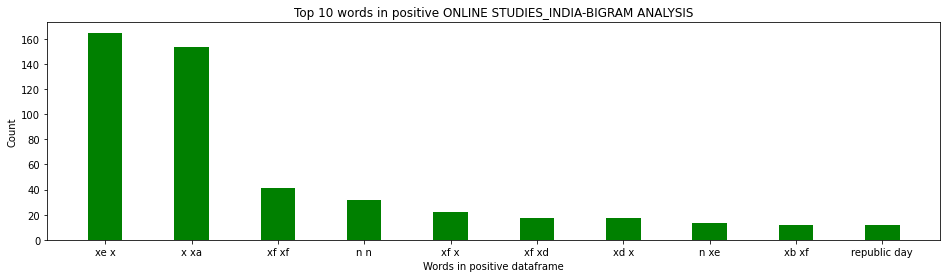

In [81]:
plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)

plt.xlabel("Words in positive dataframe")

plt.ylabel("Count")

plt.title("Top 10 words in positive ONLINE STUDIES_INDIA-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

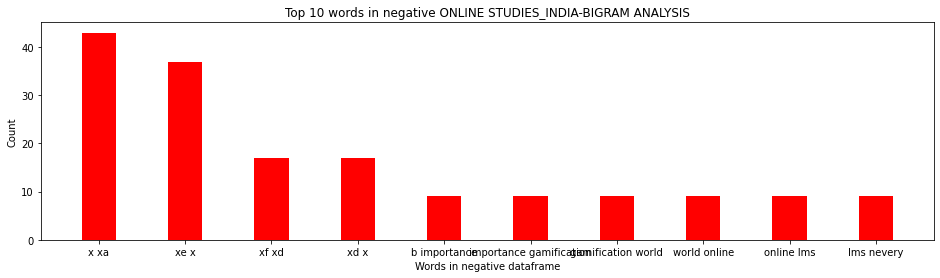

In [82]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative ONLINE STUDIES_INDIA-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

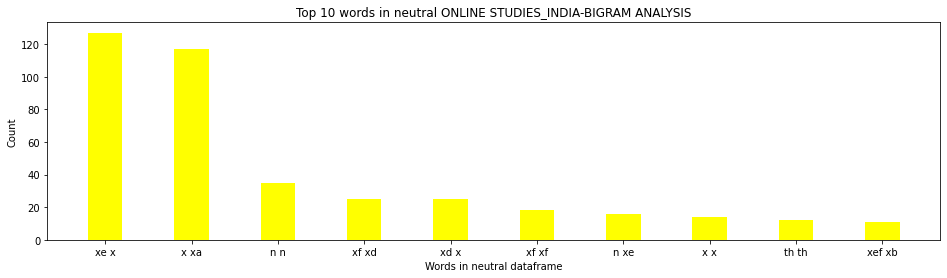

In [83]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral ONLINE STUDIES_INDIA-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#top 10 bigram neutral | n-grams


In [84]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].text:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['b', 'keep', 'learning', 'going', 'innovative', 'messaging', 'gupshup', 'smachatbot', 'assistance', 'international', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'best', 'vfx', 'courses', 'mumbai', 'placement', 'assistance', 'n', 'mumbai', 'placement', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gain', 'knowledge', 'practice', 'smartly', 'tutoroot', 'explore', 'program', 'sign', 'today', 'n', 'nlog', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'discover', 'benefits', 'earning', 'online', 'degree', 'find', 'compare', 'top', 'universities', 'subjec', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'punjab', 'govt', 'ties', 'khan', 'academy', 'generate', 'educational', 'content', 'punjabi', 'school', 'students', 'n', 'n', 'khanacademy', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'find', 'key', 'success', 'alarm', 'clock', 'benjamin', 'franklin', 'n', 'n']
Sentence after removing stopword

Sentence after removing stopwords: ['b', 'students', 'right', 'onlineexam', 'onlineexamfromhomeymca', 'onlinelearning', 'onlinesemester', 'students', 'closevtucolleges', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'top', 'offline', 'finance', 'courses', 'delhi', 'n', 'financecourses', 'delhi', 'onlinecourses', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'great', 'news', 'nstayour', 'environmental', 'learning', 'journey', 'environ', 'th', 'jan', 'n', 'learninganddevelopment', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'top', 'finance', 'courses', 'pune', 'placements', 'n', 'financecourses', 'placement', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'noziasayyed', 'anubha', 'varshaegaikwad', 'rajeshtope', 'sure', 'keep', 'children', 'safe', 'onlinelearning', 'continues', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'rewarding', 'career', 'awaits', 'nwith', 'guidance', 'resources', 'achieve', 'everything', 'desire', 'n', 

Sentence after removing stopwords: ['b', 'happyrepublicday', 'newyear', 'nwith', 'pride', 'hearts', 'smile', 'faces', 'omotec', 'team', 'wishes', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'mapchamakes', 'remotelearning', 'less', 'concern', 'effective', 'learning', 'ss', 'enjoyed', 'amp', 'proactively', 'participated', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'shine', 'successful', 'career', 'aviation', 'industry', 'jt', 'aviation', 'college', 'xe', 'xc', 'x', 'xf', 'xf', 'xe', 'x', 'xf', 'xf', 'xc', 'xf', 'xf', 'xf', 'x', 'xa', 'xe', 'x', 'xd', 'xf', 'xf', 'xe', 'x', 'n', 'xe', 'xc', 'x', 'log', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'pre', 'budget', 'byte', 'minal', 'anand', 'ceo', 'amp', 'co', 'founder', 'guruq', 'n', 'dlmagazine', 'n', 'minalanand', 'n', 'nread', 'full', 'article', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'dhmetrolife', 'teachers', 'noticed', 'many', 'students', 'turn', 'cameras', 'tests', 'use', '

In [85]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].text:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['b', 'past', 'months', 'children', 'tried', 'work', 'around', 'various', 'ways', 'build', 'investment', 'towards', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'importance', 'gamification', 'world', 'online', 'lms', 'nevery', 'training', 'professional', 'encountered', 'common', 'problem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'importance', 'gamification', 'world', 'online', 'lms', 'nevery', 'training', 'professional', 'encountered', 'common', 'problem', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'big', 'congrats', 'knowerx', 'family', 'completing', 'long', 'years', 'n', 'thanniversary', 'th', 'anniversary', 'celebration', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'republic', 'day', 'offer', 'pay', 'small', 'rs', 'n', 'find', 'unlock', 'mobile', 'xf', 'xf', 'xa', 'xd', 'contact', 'us', 'today', 'nvisit', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'onlineclasses', 'woefully'

In [86]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].text:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['b', 'weight', 'loss', 'yoga', 'classes', 'practice', 'warrior', 'yoga', 'poses', 'develop', 'warrior', 'mindset', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'gujarat', 'university', 'allows', 'post', 'graduate', 'students', 'freedom', 'appear', 'examination', 'time', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'internationalstudent', 'leeds', 'uk', 'sameepkulkarni', 'sameepkulkarnidisciple', 'music', 'sitar', 'onlinelearning', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'students', 'presently', 'class', 'v', 'vi', 'vii', 'viii', 'ix', 'x', 'amp', 'xi', 'ntest', 'date', 'th', 'th', 'th', 'th', 'th', 'th', 'th', 'amp', 'th', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'student', 'works', 'works', 'done', 'students', 'level', 'basic', 'program', 'aging', 'years', 'n', 'n', 'art', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'sunsetphotography', 'ncreator', 'thakurtms', 'nfollow', 'in

Sentence after removing stopwords: ['b', 'think', 'correct', 'answer', 'n', 'ntell', 'us', 'comments', 'n', 'n', 'artificialintelligence', 'datascience', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'yuci', 'tamil', 'nadu', 'conducting', 'webinar', 'handle', 'relationships', 'focus', 'future', 'goals', 'fr', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'efforts', 'noticed', 'nthanks', 'amar', 'ujala', 'motivation', 'means', 'lot', 'npsf', 'team', 'n', 'n', 'gratitude', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'tips', 'take', 'consideration', 'preparing', 'jee', 'neet', 'xf', 'xf', 'x', 'xa', 'n', 'n', 'etoosindia', 'exampreparationtips', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'chennai', 'north', 'district', 'yuci', 'conducting', 'online', 'career', 'guidance', 'webinar', 'sunday', 'pm', 'onw', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'xf', 'xf', 'x', 'x', 'weekly', 'q', 'amp', 'n', 'nas', 'humans', 'always',

Sentence after removing stopwords: ['b', 'quiz', 'day', 'n', 'quiz', 'quiztime', 'maths', 'mathematics', 'questionoftheday', 'radianbookcompany', 'education', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'admission', 'open', 'nfree', 'admission', 'girls', 'nenglish', 'medium', 'cbse', 'pattern', 'nhurry', 'admission', 'open', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'uttarpradesh', 'schools', 'shut', 'till', 'february', 'amid', 'surge', 'covid', 'cases', 'onlineclasses', 'continue', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'benefits', 'preschool', 'education', 'na', 'list', 'benefits', 'child', 'learns', 'attending', 'preschool', 'nwe', 'know', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'null', 'object', 'pattern', 'c', 'nread', 'c', 'elearning', 'webdevelopement', 'xe', 'x', 'xa']
Sentence after removing stopwords: ['b', 'exclude', 'multiple', 'terms', 'wptermquery', 'term', 'name', 'n', 'nread', 'xf', 'xf', 'x', 'x']
Sente

In [87]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [90]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_trigram_positive.csv",mode='w',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_trigram_negative.csv",mode='w',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_trigram_neutral.csv",mode='w',index=False,header=False)

In [91]:
df_positive3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_trigram_combine.csv",mode='a',index=False,header=False)
df_negative3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_trigram_combine.csv",mode='a',index=False,header=False)
df_neutral3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_trigram_combine.csv",mode='a',index=False,header=False)

In [92]:
df5=pd.read_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\OLS\OLS RESULTS\OLS_INDIA_trigram_combine.csv",header=None,names=["trigram","repetation"])
#np.random.seed(0))
#df5.head(20)
df5.shape

(7021, 2)

In [93]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [94]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [95]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

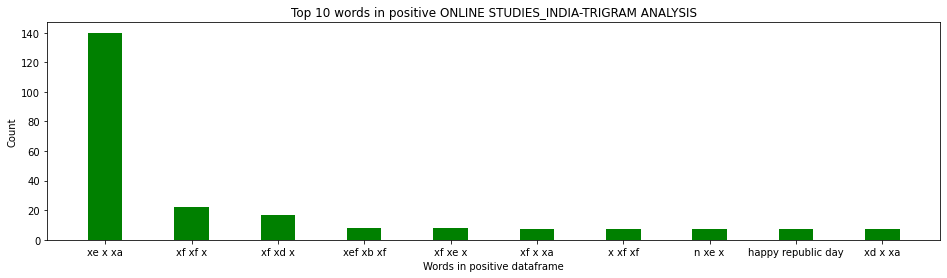

In [96]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive ONLINE STUDIES_INDIA-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")

plt.show()

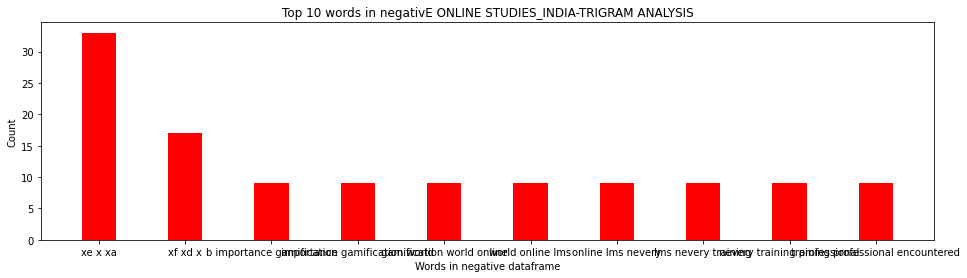

In [97]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negativE ONLINE STUDIES_INDIA-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

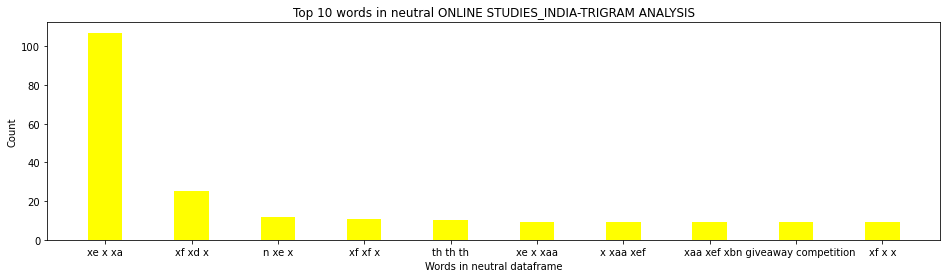

In [98]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral ONLINE STUDIES_INDIA-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()